# Getting the Diabetes Dataset

Setting up the environment

In [1]:
import pandas as pd #for the pandas dataframe
import re #for the regular expression to turn CamelCase into snake_case
import matplotlib.pyplot as plt #for visualisations
import seaborn as sns #for visualisations in higher quality
from matplotlib.colors import LinearSegmentedColormap # for custom colours of my heatmap
from scipy.stats import chi2_contingency # to calculate the independence of two categorical variables with chi-square
from scipy.stats.contingency import association # to calculate the strength of categorical relations with cramer
from wordcloud import WordCloud  #for the word cloud

# best practice for best notebook visualisations
%matplotlib inline 
pd.set_option('display.max_columns', None)

Transforming the csv dataset to a pandas dataframe

In [2]:
url = 'diabetes_dataset.csv' # data downloaded from https://www.kaggle.com/datasets/asinow/diabetes-dataset
data = pd.read_csv(url) #create a dataframe
df = data.copy() #created a copy of dataframe we will use in the analysis

Aligning all column names to be snake_case

In [ ]:
#method to convert came into snake_case
def camel_to_snake(name):
    part = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', part).lower()
''' The method is split in two as the first letter of HelloWorld does not need an underscore'''

# saving the dataframe with snake_case column names
df = df.rename(columns=lambda column: camel_to_snake(column))

### Result
The dataset is now in a dataframe called df and ready for explanatory analysis.For standardisation the column names are all lower case snake case.

# Exploratory data analysis (EDA)

In [4]:
df.head() #looking at the first five rows of the dataset

,age,pregnancies,bmi,glucose,blood_pressure,hb_a1c,ldl,hdl,triglycerides,waist_circumference,hip_circumference,whr,family_history,diet_type,hypertension,medication_use,outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [5]:
df.shape #checking numbers of rows and columns

(9538, 17)

In [6]:
df.dtypes #checking the datatypes

age                      int64
pregnancies              int64
bmi                    float64
glucose                float64
blood_pressure         float64
hb_a1c                 float64
ldl                    float64
hdl                    float64
triglycerides          float64
waist_circumference    float64
hip_circumference      float64
whr                    float64
family_history           int64
diet_type                int64
hypertension             int64
medication_use           int64
outcome                  int64
dtype: object

In [7]:
df.info() #this one has shape, dtype and null values information plus the memory size and column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9538 non-null   int64  
 1   pregnancies          9538 non-null   int64  
 2   bmi                  9538 non-null   float64
 3   glucose              9538 non-null   float64
 4   blood_pressure       9538 non-null   float64
 5   hb_a1c               9538 non-null   float64
 6   ldl                  9538 non-null   float64
 7   hdl                  9538 non-null   float64
 8   triglycerides        9538 non-null   float64
 9   waist_circumference  9538 non-null   float64
 10  hip_circumference    9538 non-null   float64
 11  whr                  9538 non-null   float64
 12  family_history       9538 non-null   int64  
 13  diet_type            9538 non-null   int64  
 14  hypertension         9538 non-null   int64  
 15  medication_use       9538 non-null   i

In [8]:
df.isna().sum() #checking for null values

age                    0
pregnancies            0
bmi                    0
glucose                0
blood_pressure         0
hb_a1c                 0
ldl                    0
hdl                    0
triglycerides          0
waist_circumference    0
hip_circumference      0
whr                    0
family_history         0
diet_type              0
hypertension           0
medication_use         0
outcome                0
dtype: int64

In [9]:
df.eq("").sum() #checking for empty strings

age                    0
pregnancies            0
bmi                    0
glucose                0
blood_pressure         0
hb_a1c                 0
ldl                    0
hdl                    0
triglycerides          0
waist_circumference    0
hip_circumference      0
whr                    0
family_history         0
diet_type              0
hypertension           0
medication_use         0
outcome                0
dtype: int64

In [10]:
df.eq("").sum() #checking for empty strings

age                    0
pregnancies            0
bmi                    0
glucose                0
blood_pressure         0
hb_a1c                 0
ldl                    0
hdl                    0
triglycerides          0
waist_circumference    0
hip_circumference      0
whr                    0
family_history         0
diet_type              0
hypertension           0
medication_use         0
outcome                0
dtype: int64

In [11]:
df.agg(['min', 'max']).T

,min,max
age,18.00,89.00
pregnancies,0.00,16.00
bmi,15.00,49.66
glucose,50.00,207.20
blood_pressure,60.00,138.00
hb_a1c,4.00,6.90
ldl,-12.00,202.20
hdl,-9.20,107.80
triglycerides,50.00,345.80
waist_circumference,40.30,163.00


In [12]:
df[df["outcome"] == 1].nunique()

age                      72
pregnancies              17
bmi                    1718
glucose                 982
blood_pressure           76
hb_a1c                   28
ldl                    1149
hdl                     690
triglycerides          1542
waist_circumference     723
hip_circumference       631
whr                      91
family_history            2
diet_type                 3
hypertension              2
medication_use            2
outcome                   1
dtype: int64

In [13]:
df[df["outcome"] == 0].nunique()

age                      72
pregnancies              17
bmi                    2116
glucose                 846
blood_pressure           72
hb_a1c                   19
ldl                    1356
hdl                     783
triglycerides          1867
waist_circumference     777
hip_circumference       691
whr                      99
family_history            1
diet_type                 3
hypertension              2
medication_use            2
outcome                   1
dtype: int64

In [14]:
#result['Proportion'] = result[True] / (result[True] + result[False])
perc_preg = (len(df.pregnancies[df['pregnancies']>0]) / (len(df.pregnancies))*100)
round(perc_preg,2)

94.16

### Result
- The data has 17 columns and 9538 rows all with either int or float datatype.
- The data has no null values, no empty strings, no duplications.
- From the min max table result it becomes easily visible that some numerical values are categorical.
- Looking at the diabetes vs. non diabetes unique numbers it is interesting that the non-diabetic group only has 19 unique HbA1c values. I would still keep them in the numerical continous group
- Assumption: It might be an only woman dataset as 94% of the patients had been pregnant.

# Changes to prepare the dataset for analysis

Dropping columns not needed for numerical vs. categorical analysis

In [15]:
# droppin numerical discrete values as not interesting for our analysis
df = df.drop(columns=['age', 'pregnancies'])

Making sure my numerical and categorical target columns are at the end

In [16]:
# The categorical target "outcome" is already the last column
# The hb_a1c is going to be put as another last column, like this it can be the target for the long term blood sugar measurement
new_order = [col for col in df.columns if col != 'hb_a1c'] + ['hb_a1c']
df = df[new_order]

Separating categorical values from numerical continous values

In [17]:
num = df.select_dtypes(include="number") # creating a numerical dataframe
cat = num.loc[:, num.nunique() < 18] # categorical values taken from the numerical dataframe
num = num.drop(columns=cat.columns) # dropping the categorical values from the numerical dataframe

Furthermore, it makes sense to have a dataframe for the diabetes and non diabetes patients.

In [18]:
# the diabetes dataframes
df_diabetes = df.groupby("outcome").get_group(1)
cat_diabetes = cat[cat["outcome"] == 1]
num_diabetes = df_diabetes.select_dtypes(include="number")
num_diabetes = num_diabetes.drop(columns=cat.columns)

# the non diabetic dataframes
df_no_diabetes = df.groupby("outcome").get_group(0)
cat_no_diabetes = cat[cat["outcome"] == 0]
num_no_diabetes = df_no_diabetes.select_dtypes(include="number")
num_no_diabetes = num_no_diabetes.drop(columns=cat.columns)

In [19]:
df_diabetes.shape

(3282, 15)

In [20]:
df_no_diabetes.shape

(6256, 15)

In [21]:
df_no_diabetes.nunique()

bmi                    2116
glucose                 846
blood_pressure           72
ldl                    1356
hdl                     783
triglycerides          1867
waist_circumference     777
hip_circumference       691
whr                      99
family_history            1
diet_type                 3
hypertension              2
medication_use            2
outcome                   1
hb_a1c                   19
dtype: int64

In [22]:
df_diabetes.nunique()

bmi                    1718
glucose                 982
blood_pressure           76
ldl                    1149
hdl                     690
triglycerides          1542
waist_circumference     723
hip_circumference       631
whr                      91
family_history            2
diet_type                 3
hypertension              2
medication_use            2
outcome                   1
hb_a1c                   28
dtype: int64

Result:
- **df** is the total dataframe, **df_diabetes** are only the diabetic ones, **df_no_diabetes** are the non diabetic patients
- **num** is all numerical values, **num_diabetes** is all numerical values for the diabetic patients, **num_no_diabetes** is all numerical values for non diabetic patients.
The target for the num dataframes is glucose.
- **cat** is all categorical values, **cat_diabetes** is all categorical values , **cat_no_diabetes** is all categorical values.
The target for the categorical dataframe is outcome. 


# Wordcloud

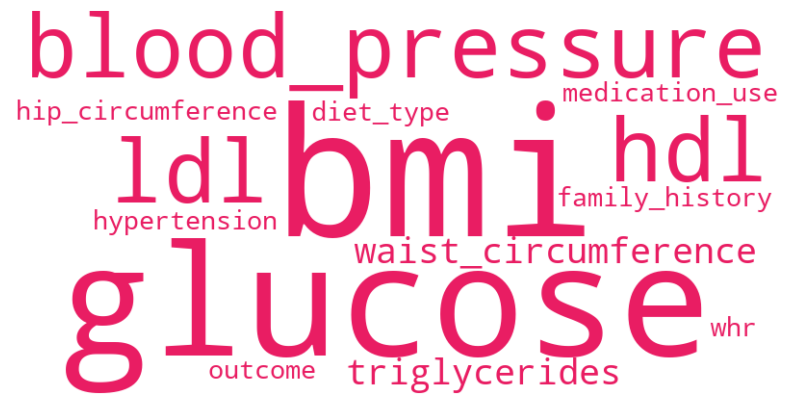

In [23]:
#Creating a wordcloud to easier introduce the dataset to the team
text = ' '.join(df.columns[:-1])

def single_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return '#e91d63'

# Generate the word cloud with the custom single color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=single_color_func).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('What matters for diabetes?')
plt.axis('off')  # Hide the axes
plt.savefig("plots/wordcloud_all_columns.png")
plt.show()

# Categorical Value Analysis

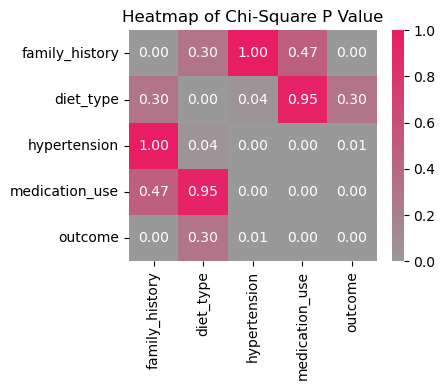

In [24]:
# creating the table manually
cat_columns = ['family_history', 'diet_type', 'hypertension', 'medication_use',
       'outcome']
corr_mat_chi = {}
for i in cat_columns:
    # inner dictionary for each column i
    corr_mat_chi[i] = {}
    for j in cat_columns:
       _, pvalue,_,_ = chi2_contingency(pd.crosstab(df[i], df[j]))
       corr_mat_chi[i][j] = pvalue
df_table = pd.DataFrame(corr_mat_chi)
 # heatmap
plt.figure(figsize=(4,3))
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#999999','#e91d63'])
sns.heatmap(df_table, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title('Heatmap of Chi-Square P Value')
plt.savefig("plots/cat_chi2_pvalue.png")
plt.show()

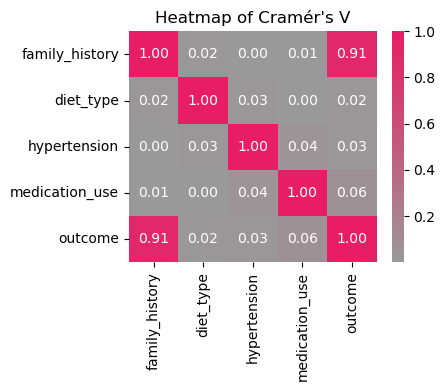

In [25]:
# creating the table manually
cat_columns = ['family_history', 'diet_type', 'hypertension', 'medication_use',
       'outcome']
dict= {}
for i in cat_columns:
    # inner dictionary for each column i
    dict[i] = {}
    for j in cat_columns:
       cramer_v = association(pd.crosstab(df[i], df[j]), method='cramer')
       dict[i][j] = cramer_v
df_table = pd.DataFrame(dict)
 # heatmap
plt.figure(figsize=(4,3))
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#999999','#e91d63'])
sns.heatmap(df_table, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title("Heatmap of Cramér's V")
plt.savefig("plots/cat_cramer_v.png")
plt.show()

# Chi- Square and Cramér's V for the categorical variables

In [26]:
# crosstab outcome and family_history
crosstab_result = pd.crosstab(df['outcome'], df['family_history'])
crosstab_result

family_history,0,1
outcome,,
0,6256,0
1,397,2885


In [27]:
# calculating chi square
_, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)
chi2_pvalue = float(chi2_pvalue)
print(f" The chi2 p value is {chi2_pvalue:.2e} and under < 0.05: {chi2_pvalue < 0.05}")

 The chi2 p value is 0.00e+00 and under < 0.05: True


The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the 0 ( p )-value, we reject the null hypothesis. This implies that there's a significant association between family_history and outcome in the dataset.

In [28]:
association(crosstab_result, method='cramer')
print(f"The Cramer value is {association(crosstab_result, method='cramer'):.2f}")

The Cramer value is 0.91


The Cramer value of 0.91 suggests a strong association between two variables "outcome" and "family_history"

# Frequency analysis

### Frequency table on family_history
Standard way of doing the frequency table

In [29]:
frequency_table = cat["family_history"].value_counts()
proportion_table = cat["family_history"].value_counts(normalize=True).round(2)
df_family_hist= pd.concat([frequency_table, proportion_table], axis=1)
df_family_hist.columns = ['absolute_frequency', 'relative_frequency']
df_family_hist

,absolute_frequency,relative_frequency
family_history,,
0,6653,0.7
1,2885,0.3


Frequency table with sublevels

In [30]:
cols = ["outcome", "family_history"] #saving the columns names I want to keep in a variable
dfc = df[cols] #creating a subset of the dataframe
dfc[cols] = dfc[cols].map(lambda x: bool(x)) #for better readability turning 0,1 integers into boolean True,False values
dfc.columns = ['Diabetes', 'Family History'] #for better readability renaming the columns
dfc

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_61913/3179413973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[cols] = dfc[cols].map(lambda x: bool(x)) #for better readability turning 0,1 integers into boolean True,False values


,Diabetes,Family History
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
9533,False,False
9534,True,True
9535,False,False
9536,True,True


In [31]:
group_counts = dfc.groupby(['Diabetes', 'Family History']).size() #grouping the data and checking the rows per group
group_counts

Diabetes  Family History
False     False             6256
True      False              397
          True              2885
dtype: int64

In [32]:
dfg = pd.DataFrame(group_counts) # converting the series into a dataframe
dfg
#Note: I did not reset index and gave it a name as anyways have to convert columns names later

0
Diabetes Family History      
False    False           6256
True     False            397
         True            2885

In [33]:
subcategory = group_counts.groupby(level=0).apply(lambda x: (100 * x / x.sum()).round(2)) #create the percentage per sublevel index
subcategory

Diabetes  Diabetes  Family History
False     False     False             100.0
True      True      False              12.1
                    True               87.9
dtype: float64

In [34]:
dfs = pd.DataFrame(subcategory) #convert series into a dataframe
dfs = dfs.droplevel(0) #drop the duplicate index
dfs

0
Diabetes Family History       
False    False           100.0
True     False            12.1
         True             87.9

In [35]:
dff = pd.merge(dfg,dfs, on=['Diabetes', 'Family History']) #merging both dataframes on the common index
dff.columns = ['Absolute Frequency', 'Relative Frequency'] #re-naming the columns
dff

Absolute Frequency  Relative Frequency
Diabetes Family History                                        
False    False                         6256               100.0
True     False                          397                12.1
         True                          2885                87.9

# Numerical Continous Analysis

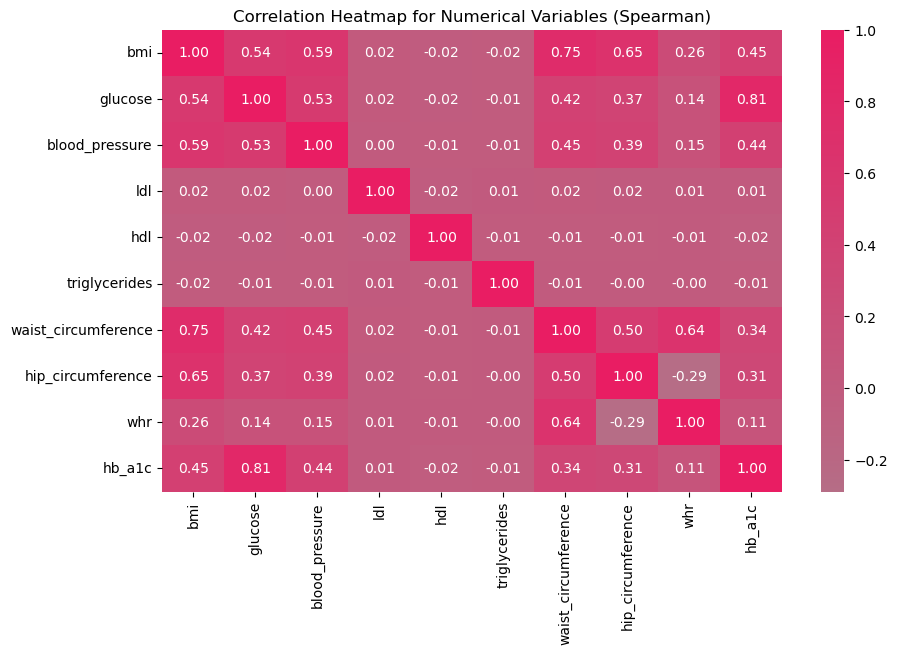

In [36]:
correlation_matrix = num.corr(method="spearman")
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 6))

# Drawing the heatmap for the numerical columns
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#999999','#e91d63'])
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, center=0, fmt=".2f")

plt.title("Correlation Heatmap for Numerical Variables (Spearman)")
plt.savefig("plots/num_spearman.png")
plt.show()
#note: although using the same colours as above I don't get a gray pink scale

Spearman shows the monotonic relationship. It means one value increases for sure the other one does not decrease (or the other way round). The strongest monotic relationship is between glucose and hb_a1c.

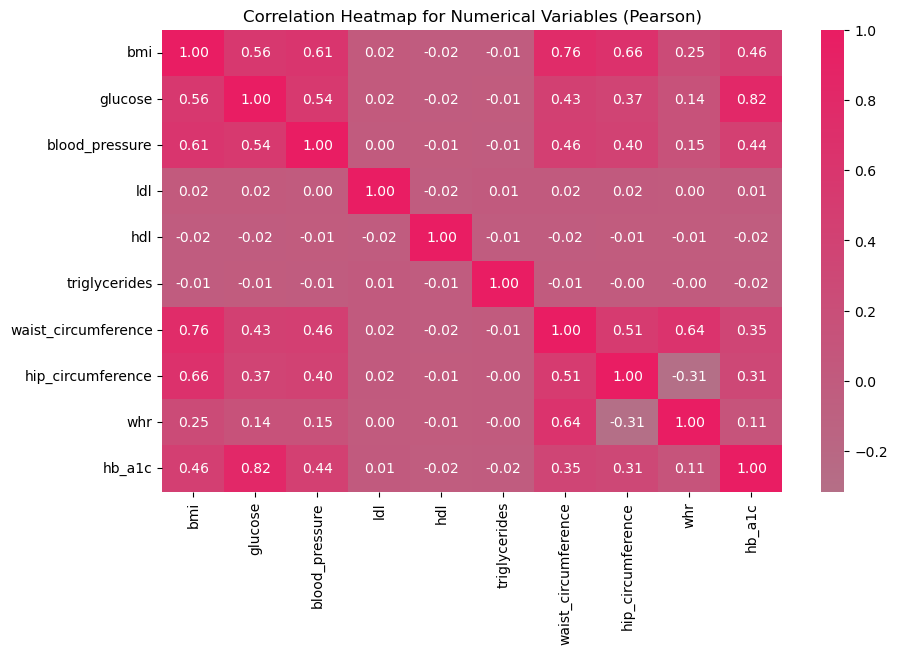

In [37]:
correlation_matrix = num.corr()
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10,6))

# Drawing the heatmap for the numerical columns
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#999999','#e91d63'])
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f")

plt.title("Correlation Heatmap for Numerical Variables (Pearson)")
plt.savefig("plots/num_pearson.png")
plt.show()
#note: although using the same colours as above I don't get a gray pink scale

Pearson shows the linear relationship: if one value increases, so does the other one too (or other way round). The strongest linear relationship is between glucose and hb_a1c.

Due to the strongest linear and monotonic relationship mentioned above, I decided to scatter plot it, view below.

/opt/anaconda3/lib/python3.12/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


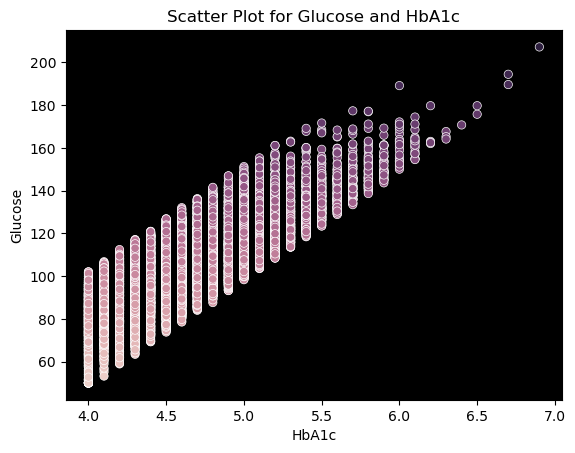

In [38]:
# Plotting a scatter plot to visualize the relationship 
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f48fb1', '#e91d63', '#880d33'])
sns.scatterplot(data=df, x='hb_a1c', y='glucose', hue='glucose', legend=False, cmap=custom_cmap)
plt.gca().set_facecolor('black') 
plt.xlabel('HbA1c')
plt.ylabel('Glucose')
plt.title("Scatter Plot for Glucose and HbA1c")
plt.savefig("plots/sctr_gluc_hb.png")
plt.show()

# Comparing Diabetic vs. Non Diabetic

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_61913/1680284238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_chart, x="outcome", y="glucose", palette=custom_cmap)


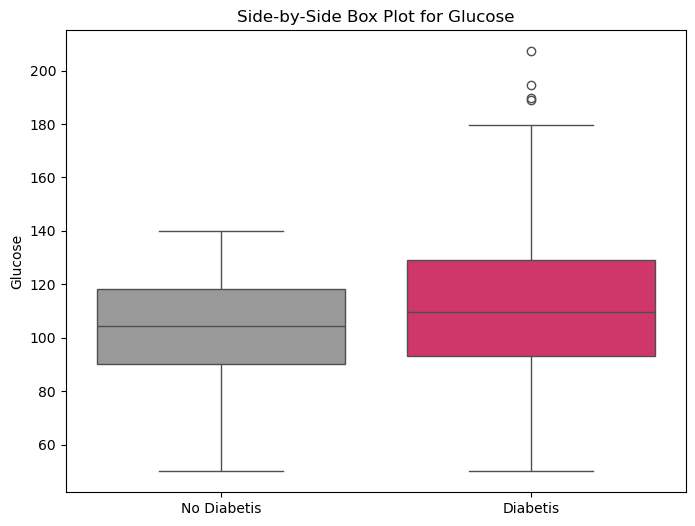

In [39]:
df_chart = df.copy()
df_chart['outcome'] = df_chart['outcome'].map({0: 'No Diabetis', 1: 'Diabetis'}) # making the chart more readable

plt.figure(figsize=(8, 6))
custom_cmap =  ['#999999','#e91d63']
sns.boxplot(data=df_chart, x="outcome", y="glucose", palette=custom_cmap)


plt.title('Side-by-Side Box Plot for Glucose')
plt.ylabel('Glucose')
plt.xlabel('')
plt.savefig("plots/gluc_diab_nondiab.png")
plt.show()

/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_61913/1546355468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_chart, x="outcome", y="hb_a1c", palette=custom_cmap)


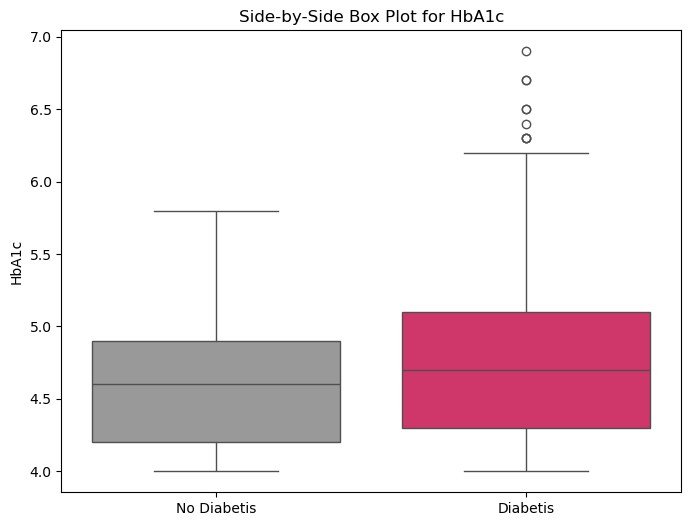

In [40]:
plt.figure(figsize=(8, 6))
custom_cmap =  ['#999999','#e91d63']
sns.boxplot(data=df_chart, x="outcome", y="hb_a1c", palette=custom_cmap)


plt.title('Side-by-Side Box Plot for HbA1c')
plt.ylabel('HbA1c')
plt.xlabel('')
plt.savefig("plots/hba1c_diab_nondiab.png")
plt.show()